# Importing tools

In [1]:
# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps  

# Deep learnings libs
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing




In [ ]:
# Neural imaging libs
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
!pip install git+https://github.com/miykael/gif_your_nifti  
import gif_your_nifti.core as gif2nif

# Checking GPU is available or not

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

# Getting raw images

In [5]:
# flair --> raw images
FLAIR_IMAGES_PATH = glob.glob("archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"+"**/*_flair.nii",recursive=True)
FLAIR_IMAGES_PATH[:5]

['archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_001\\BraTS20_Training_001_flair.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_002\\BraTS20_Training_002_flair.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_003\\BraTS20_Training_003_flair.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_004\\BraTS20_Training_004_flair.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_005\\BraTS20_Training_005_flair.nii']

In [6]:
print(f"{len(FLAIR_IMAGES_PATH)} images detected")

20 images detected


# Visualize images

In [7]:
import skimage.io as io
import random

rand_img_path = FLAIR_IMAGES_PATH[15]
rand_img = io.imread(rand_img_path,plugin='simpleitk')

In [8]:
# Images have 3 dimensions.Not 2-D
print(f"Image shape : {rand_img.shape}")

# Images have 16-bits.
print(f"Image type : {rand_img.dtype}")

Image shape : (155, 240, 240)
Image type : int16


In [9]:
def visualize_flair_images(images_path,row,col=3):
    plt.figure(figsize=(20,20))
    plt.suptitle("Flair Images -- Axial / Coronal / Sagittal",fontsize=25)
    count = 1   

    for i in range(row):

        rand_num = random.randint(1,len(images_path))
        rand_img_path = images_path[rand_num]
        rand_img = io.imread(rand_img_path,plugin='simpleitk')
        
        axial = rand_img[100,:,:]
        coronal = rand_img[:,100,:]
        sagittal = rand_img[:,:,100]
        
        plt.subplot(row,col,count)
        plt.imshow(axial)
        plt.yticks([])
        plt.xticks([])
        count += 1
        
        plt.subplot(row,col,count)
        plt.imshow(coronal)
        plt.yticks([])
        plt.xticks([])
        count += 1     

        plt.subplot(row,col,count)
        plt.imshow(sagittal)
        plt.yticks([])
        plt.xticks([])
        count += 1 
        

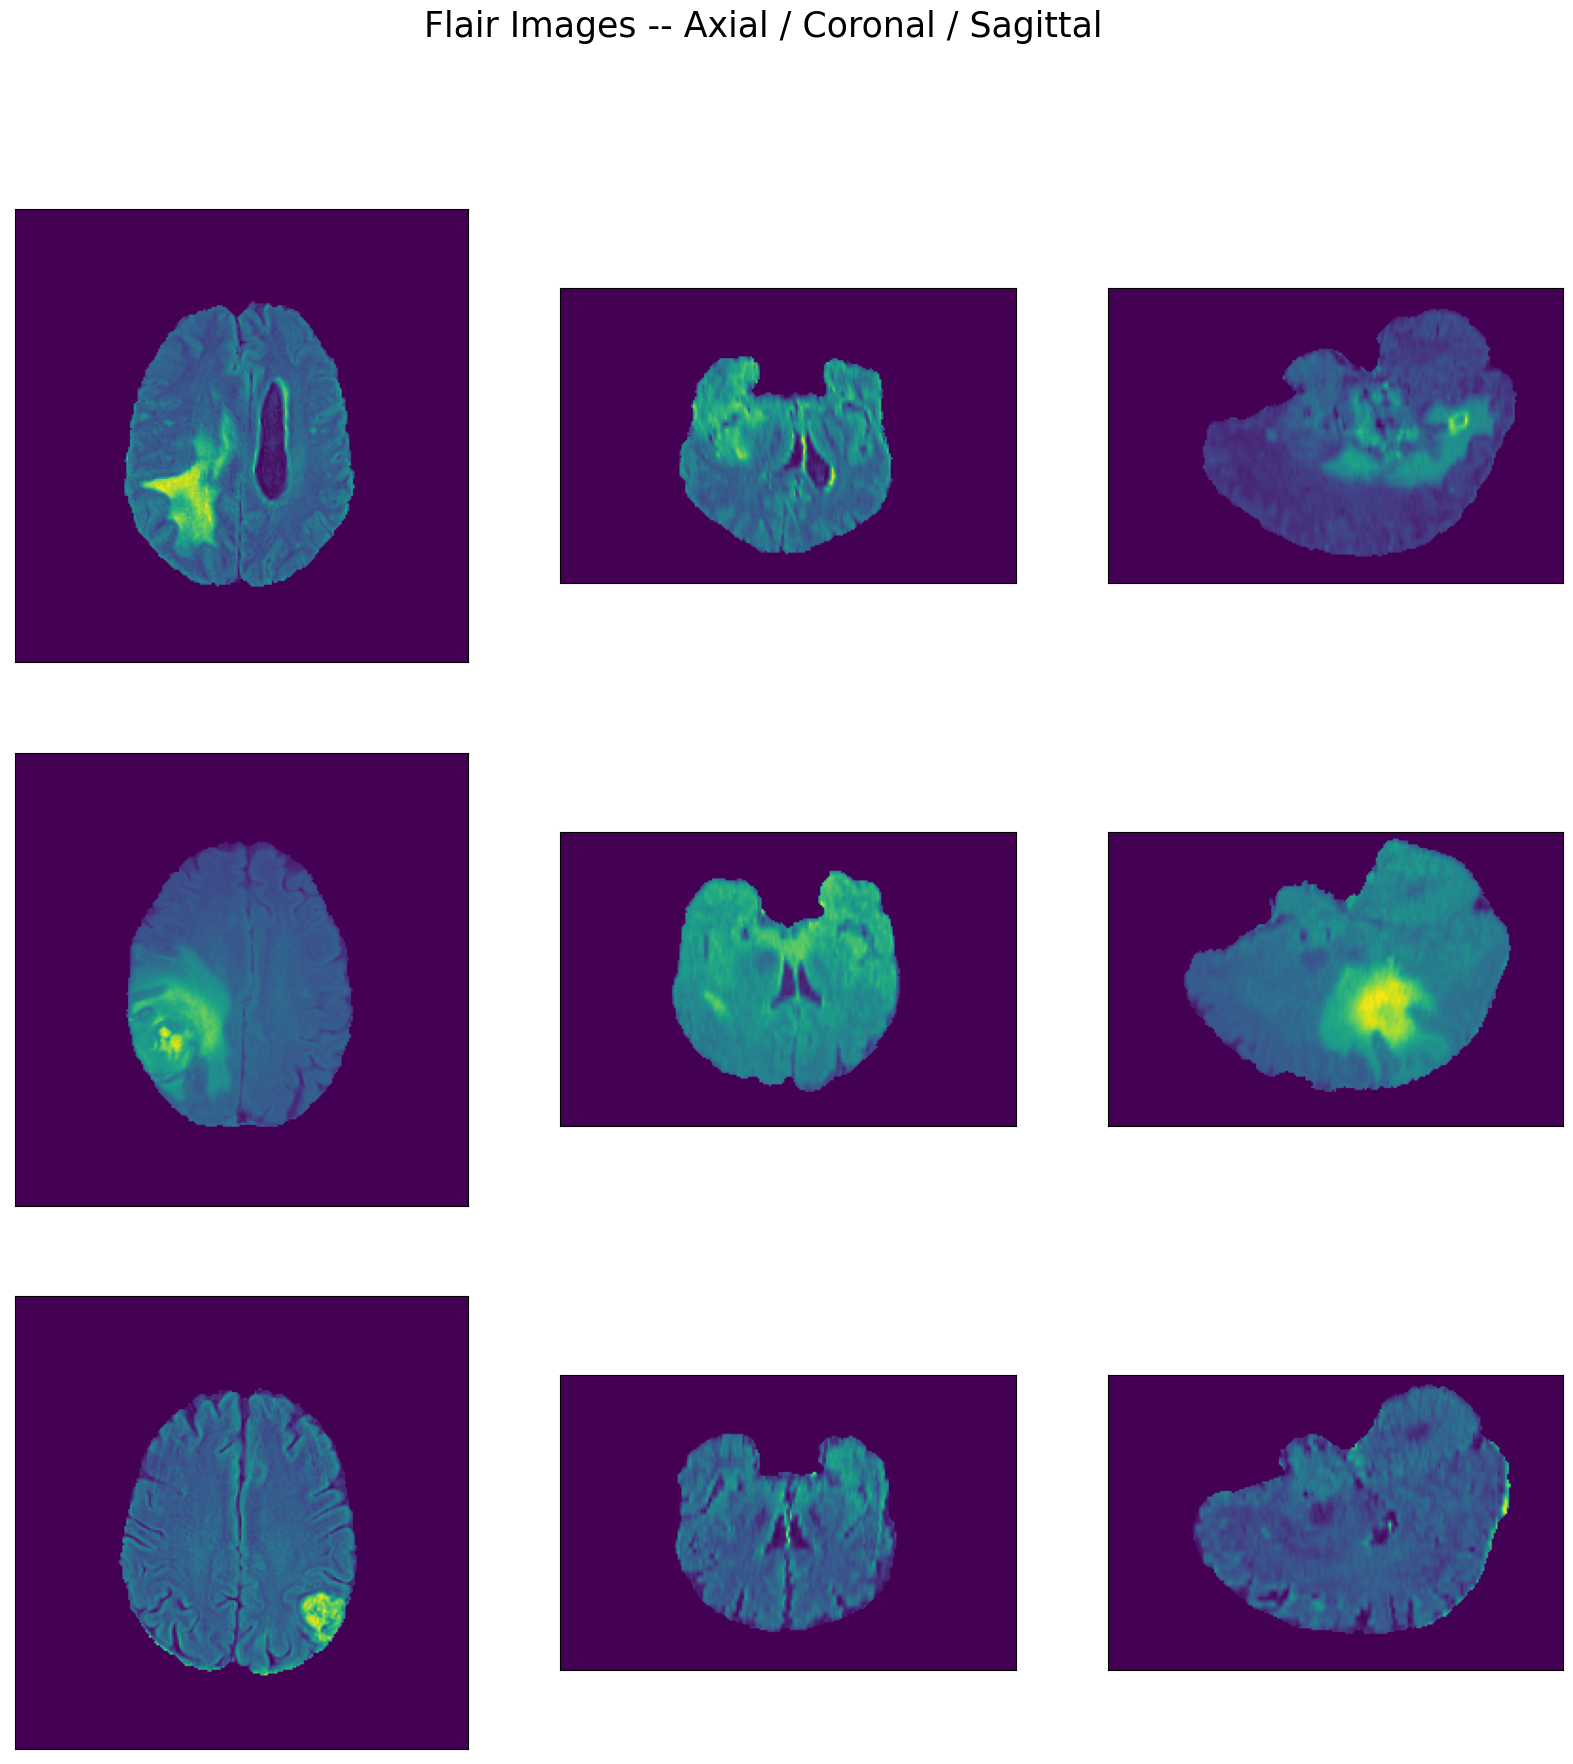

In [10]:
visualize_flair_images(FLAIR_IMAGES_PATH,row=3)

In [11]:
SEG_IMAGES_PATH = glob.glob("archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"+"**/*_seg.nii",recursive=True)
SEG_IMAGES_PATH[:5]

['archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_001\\BraTS20_Training_001_seg.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_002\\BraTS20_Training_002_seg.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_003\\BraTS20_Training_003_seg.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_004\\BraTS20_Training_004_seg.nii',
 'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_005\\BraTS20_Training_005_seg.nii']

In [12]:
seg_img = io.imread(SEG_IMAGES_PATH[15],plugin="simpleitk")
seg_img.shape

(155, 240, 240)

In [13]:
seg_img.dtype

dtype('uint8')

In [14]:
def visualize_flair_seg(flair_path,seg_path):
    plt.figure(figsize=(20,20))
    
    flair_img = io.imread(flair_path,plugin='simpleitk')
    seg_img = io.imread(seg_path,plugin='simpleitk')
    
    axial = flair_img[100,:,:]
    coronal = flair_img[:,100,:]
    sagittal = flair_img[:,:,100]
    
    seg_axial = seg_img[100,:,:]
    seg_coronal = seg_img[:,100,:]
    seg_sagittal = seg_img[:,:,100]
    
    
    plt.suptitle(str(flair_path)+str("\n")+str(seg_path))
    
    plt.subplot(3,2,1)
    plt.imshow(axial)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Axial flair",fontsize=15)
    
    plt.subplot(3,2,2)
    plt.imshow(seg_axial)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Axial tumor",fontsize=15)
    
    plt.subplot(3,2,3)
    plt.imshow(coronal)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Coronal flair",fontsize=15)

    
    plt.subplot(3,2,4)
    plt.imshow(seg_coronal)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Coronal tumor",fontsize=15)

    
    plt.subplot(3,2,5)
    plt.imshow(sagittal)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Sagittal flair",fontsize=15)

    
    plt.subplot(3,2,6)
    plt.imshow(seg_sagittal)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Sagittal tumor",fontsize=15)


    

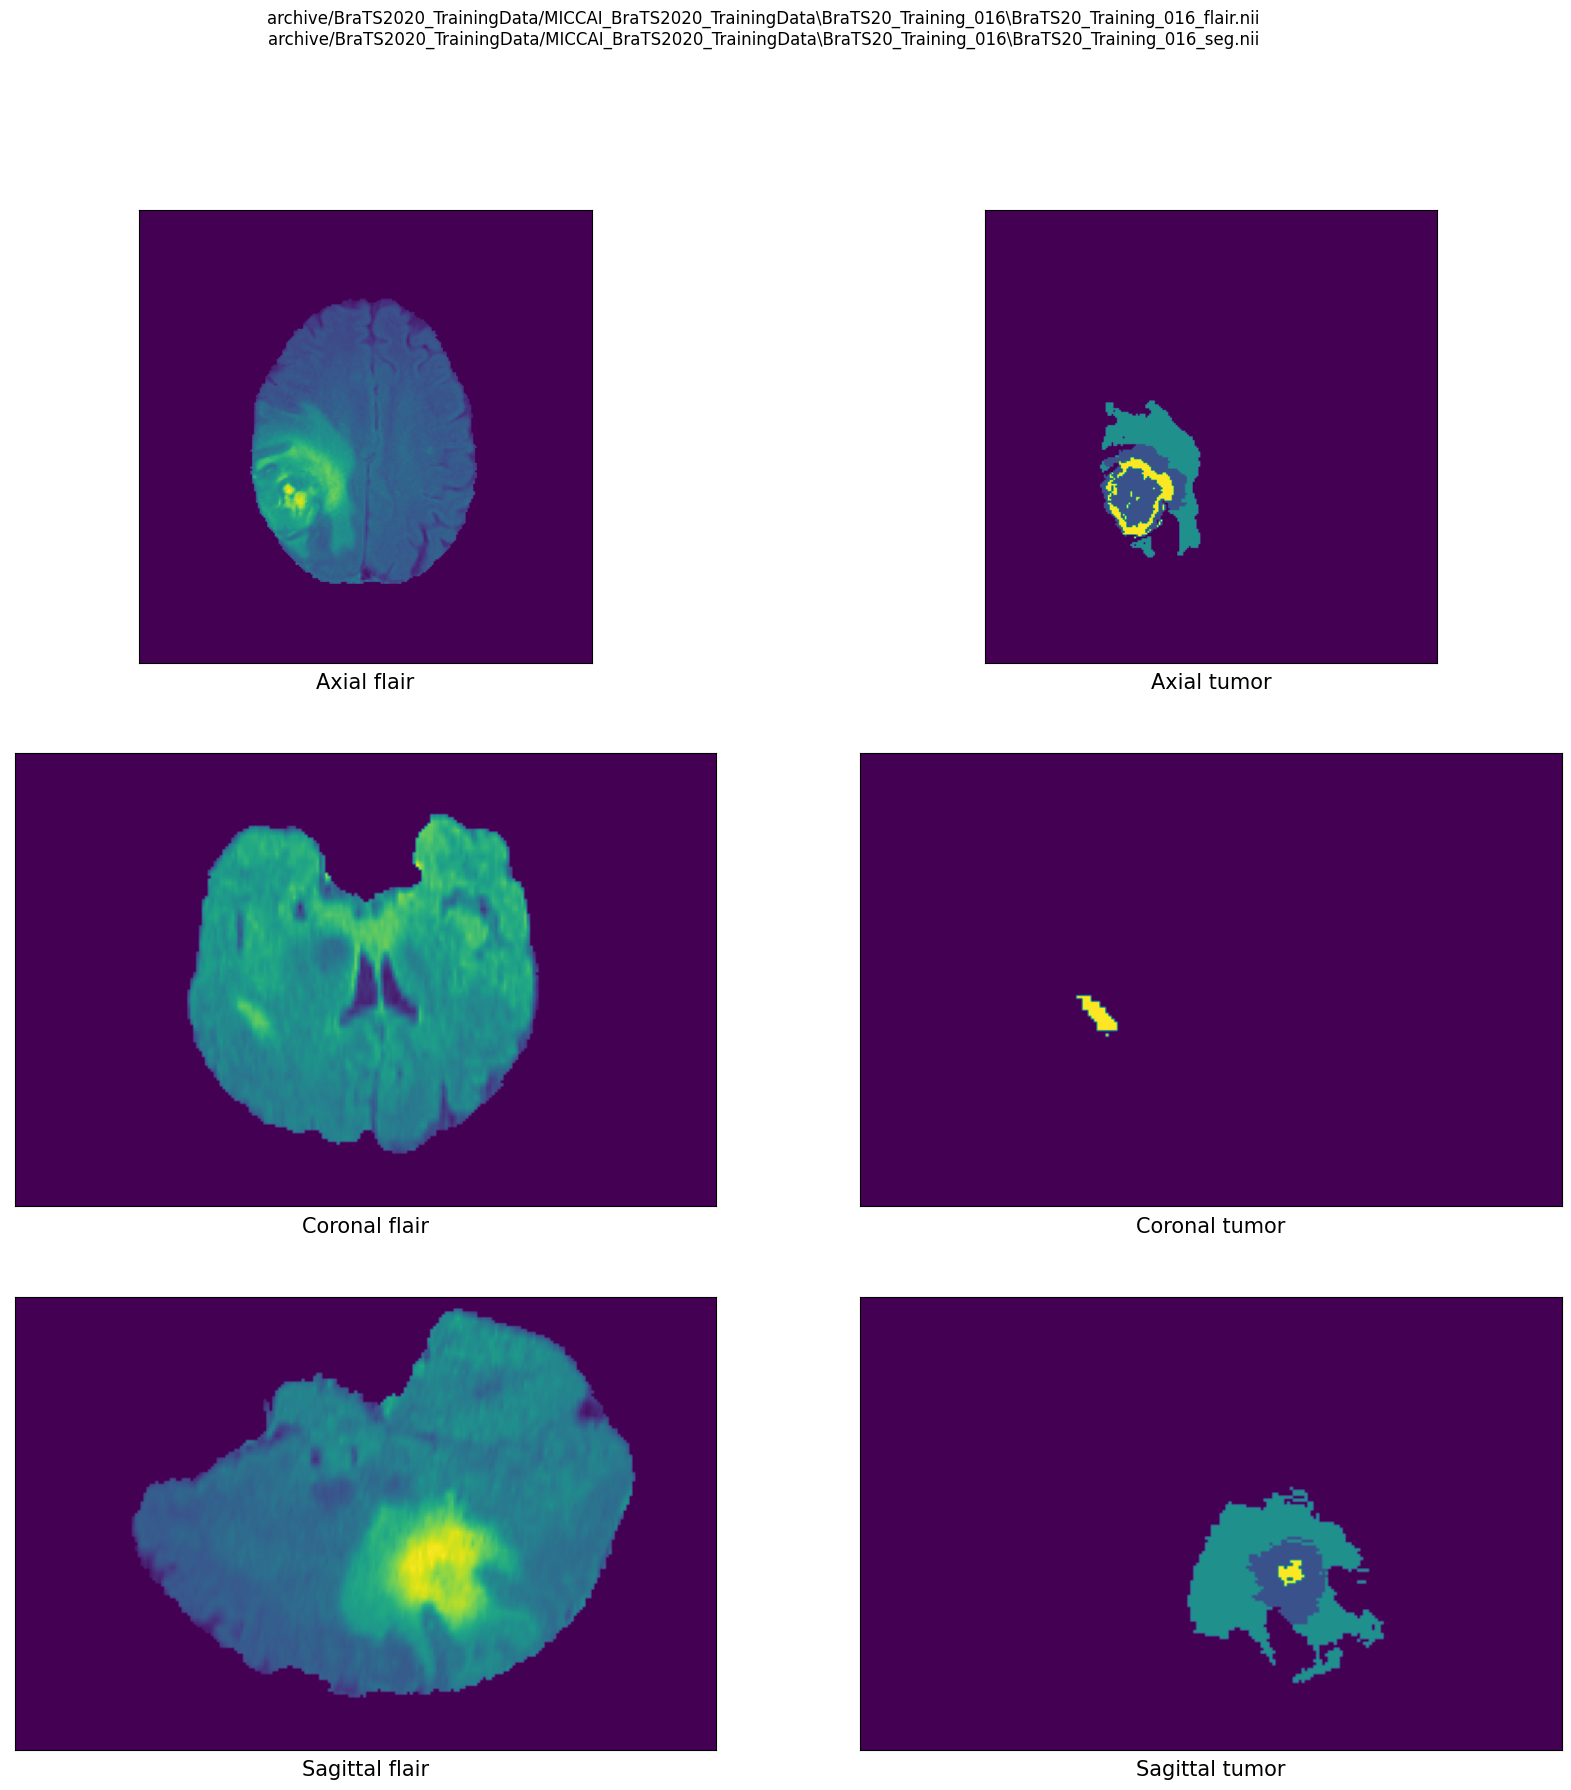

In [15]:
visualize_flair_seg(FLAIR_IMAGES_PATH[15],SEG_IMAGES_PATH[15])

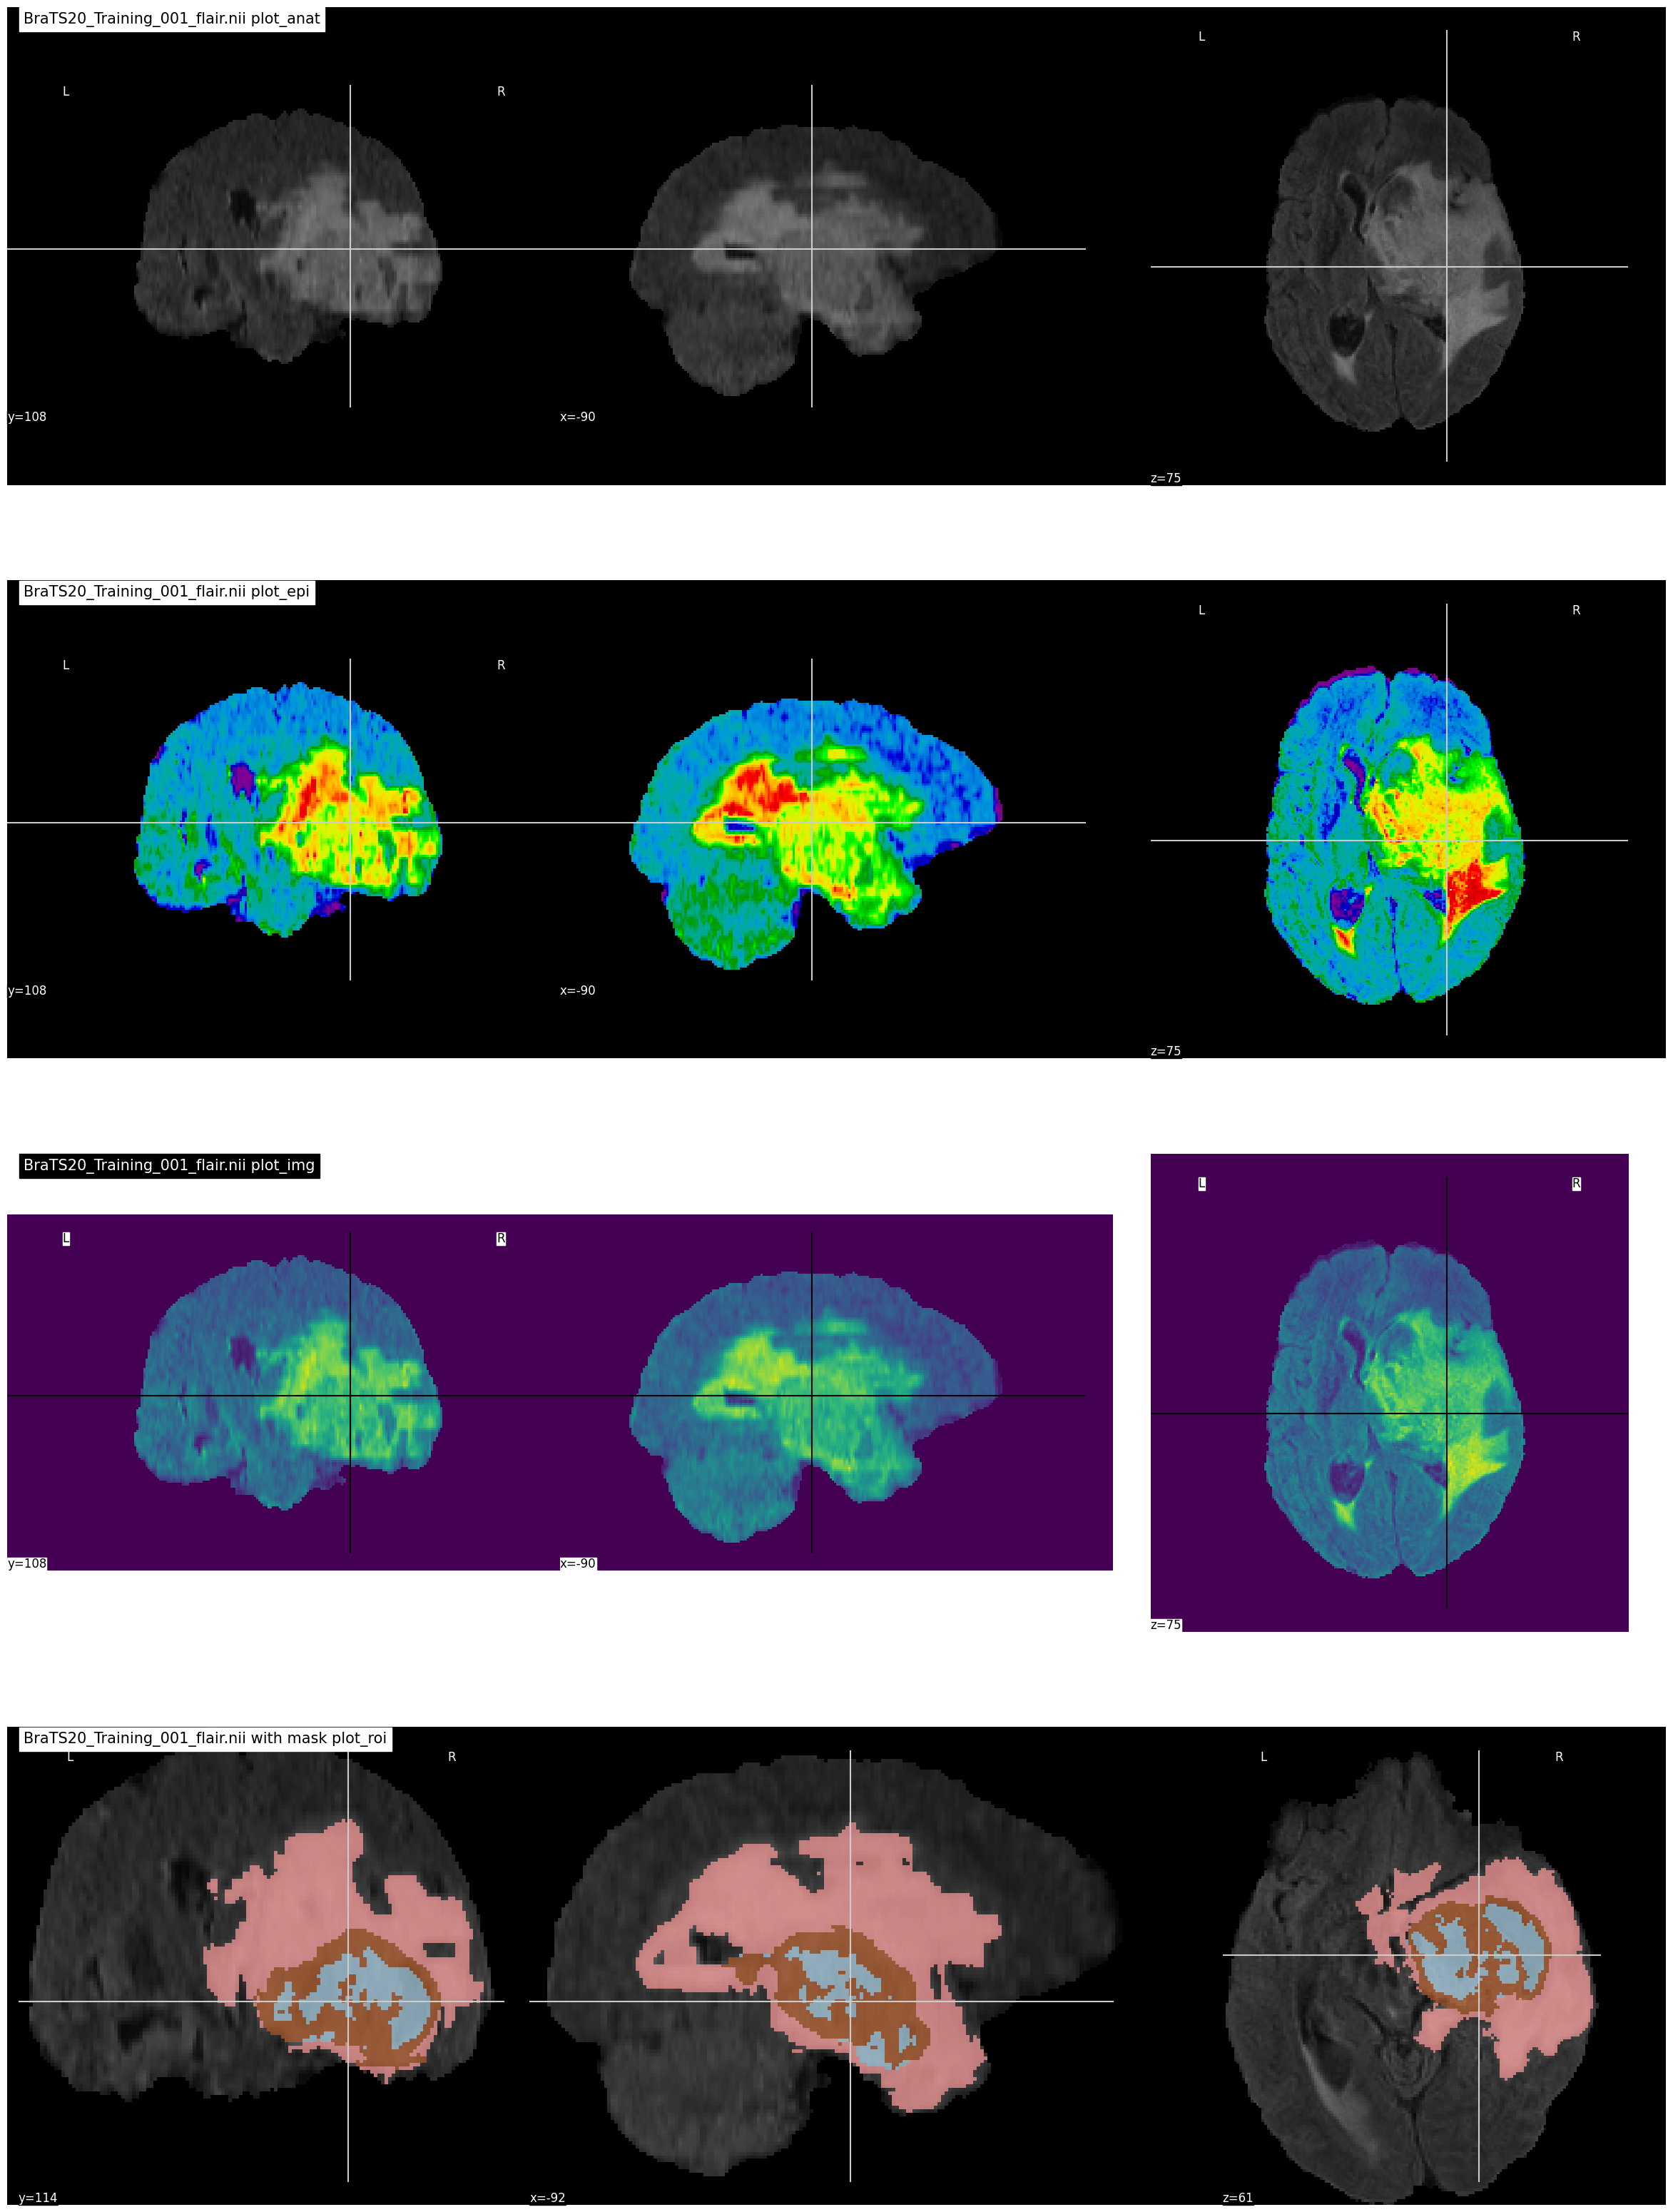

In [16]:
TRAIN_DATASET_PATH = "archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

niimg = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii')
nimask = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))


nlplt.plot_anat(niimg,
                title='BraTS20_Training_001_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS20_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS20_Training_001_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask, 
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()

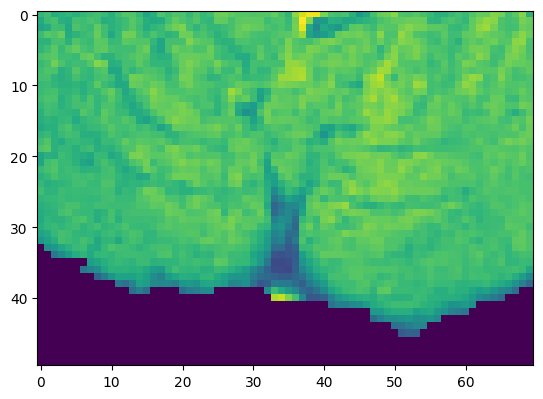

In [17]:
im = io.imread(FLAIR_IMAGES_PATH[15],plugin='simpleitk')
plt.imshow(im[20,150:200,80:150])

In [18]:
(im[20,150:200,80:150]/255).dtype

dtype('float64')

# Train dataset preprocessing

In [19]:
def load_train_dataset(train_dataset_path,end):
    train_images = []
    images_path = glob.glob(train_dataset_path+end,recursive=True)
    random.seed(25)
    random.shuffle(images_path)
    for path in images_path:
        img = io.imread(path,plugin='simpleitk') 
        img = (img-img.mean())/img.std()
        img.astype('float16')
        for slice in range(75,125):
            img_sliced = img[slice,:,:]
            img_sliced = np.expand_dims(img_sliced,axis=0)
            train_images.append(img_sliced)
            
    return np.array(train_images,dtype=np.float16)

In [20]:
TRAIN_IMAGES = load_train_dataset(TRAIN_DATASET_PATH,"**/*_flair.nii")

In [21]:
# Every sample has 60 image because of 3-D image. 
TRAIN_IMAGES.shape

(1000, 1, 240, 240)

In [22]:
TRAIN_IMAGES[0]

array([[[-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404],
        [-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404],
        [-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404],
        ...,
        [-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404],
        [-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404],
        [-0.404, -0.404, -0.404, ..., -0.404, -0.404, -0.404]]],
      dtype=float16)

In [23]:
# There are 100 3-D image and each 3-D image has 50 2-D images.
5000/50  

100.0

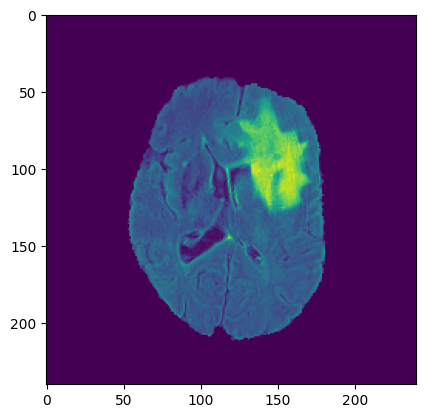

In [24]:
plt.imshow(TRAIN_IMAGES[0].reshape(240,240))

# Visualizing segmentation dataset

    0 : 'NOT tumor'
    
    1 : 'NECROTIC/CORE',NON-ENHANCING tumor CORE
    
    2 : 'EDEMA'
    
    4 : 'ENHANCING' 

In [25]:
seg_img.shape

(155, 240, 240)

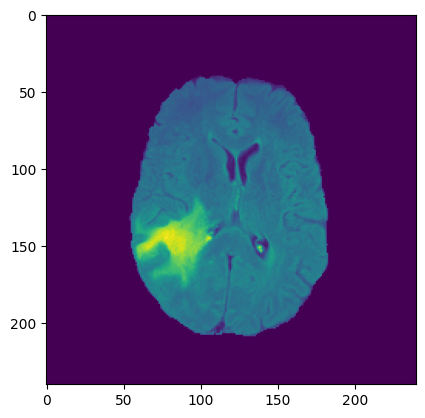

In [26]:
im1 = io.imread(FLAIR_IMAGES_PATH[15],plugin='simpleitk')
plt.imshow(im1[75,:,:])

In [27]:
plt.imshow(seg_img[75,:,:])

In [28]:
seg_copy = seg_img.copy()
seg_copy.shape

(155, 240, 240)

In [29]:
a = np.where(seg_copy!=4,0,seg_copy)
plt.imshow(a[75,:,:])

In [30]:
def visualize_segmentation_image(flair_path,seg_path):
    plt.figure(figsize=(25,20))
    
    flair_img = io.imread(flair_path,plugin='simpleitk')[75,:,:]
    flair_copy = flair_img.copy()
    
    seg_img = io.imread(seg_path,plugin='simpleitk')[75,:,:]
    seg_copy = seg_img.copy()
    
    seg_necroz = np.where(seg_copy!=1,0,seg_copy)
    seg_edema = np.where(seg_img!=2,0,seg_copy)
    seg_enhancing = np.where(seg_copy!=4,0,seg_copy)
        
    plt.subplot(1,5,1)
    plt.imshow(flair_copy)
    plt.title("Flair Image")
    
    plt.subplot(1,5,2)
    plt.imshow(seg_copy)
    plt.title("Segmentation Image")
    
    seg_labels = [seg_necroz,seg_edema,seg_enhancing]
    seg_names = ["Necroz Section","Edema Section","Enhancing Tumor Section"]

    for sub,seg,name in zip(range(3,6),seg_labels,seg_names):
        plt.subplot(1,5,sub)
        plt.imshow(seg)
        plt.title(name)
          
    

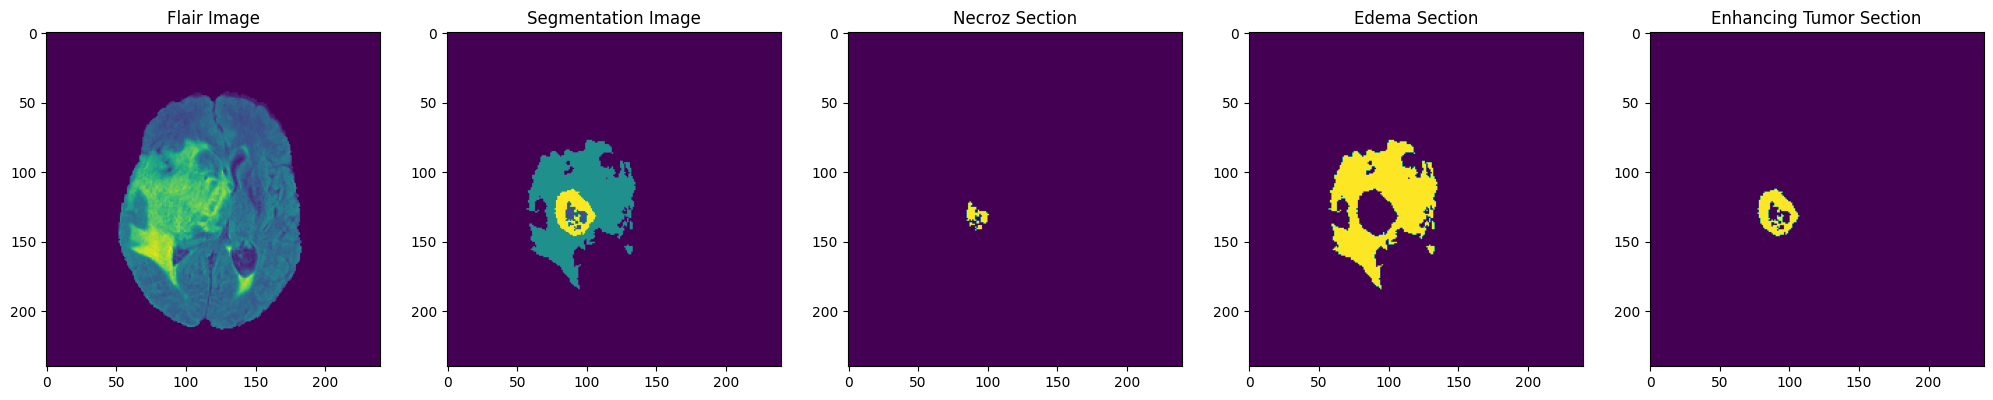

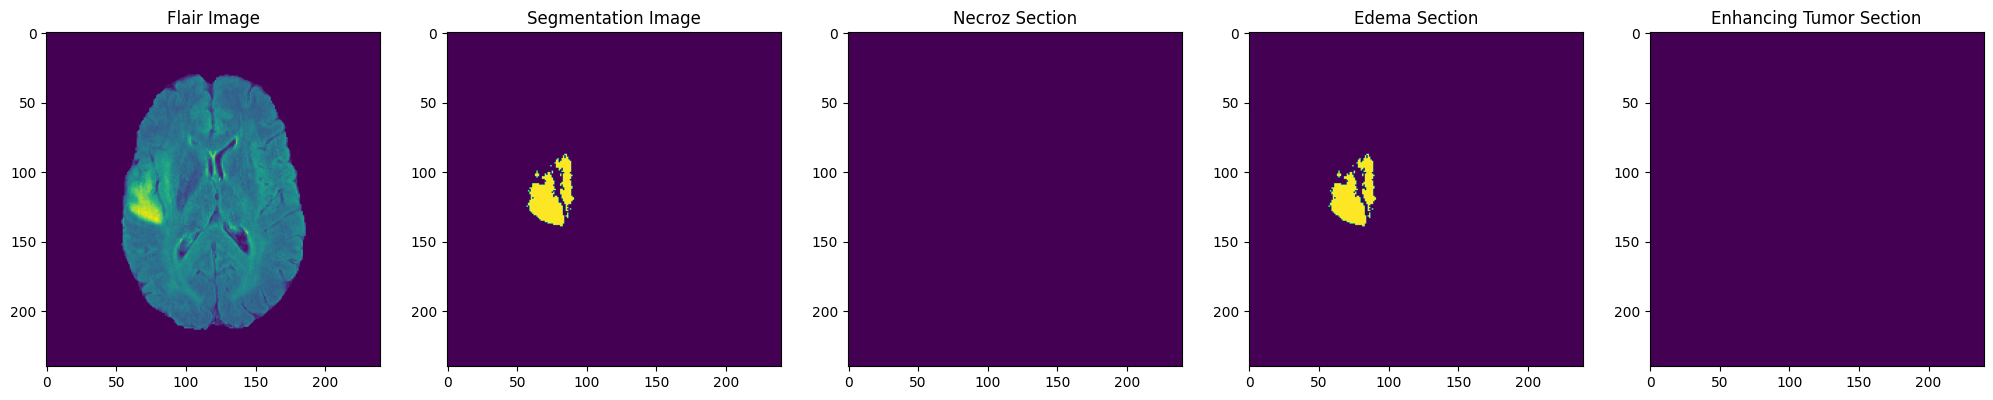

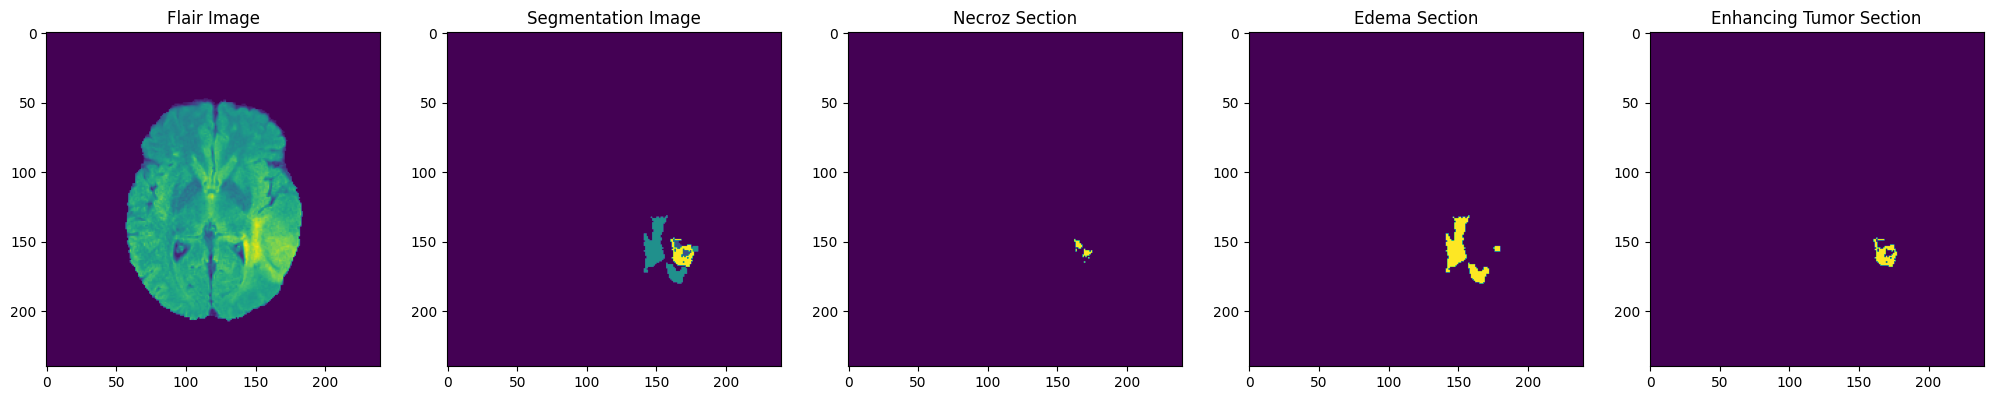

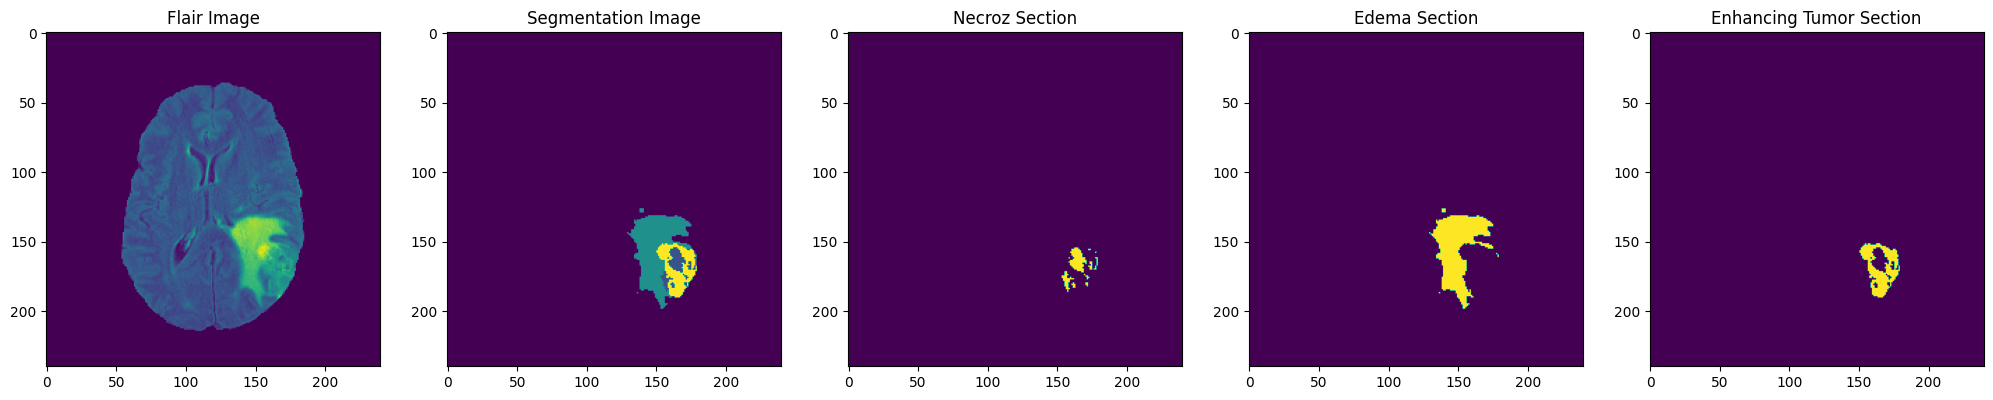

In [31]:
for i in range(5):
    visualize_segmentation_image(FLAIR_IMAGES_PATH[i],SEG_IMAGES_PATH[i])
    

In [32]:
FLAIR_IMAGES_PATH[15]

'archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_016\\BraTS20_Training_016_flair.nii'

In [33]:
def load_seg_dataset(seg_dataset_path,end,label):
    seg_images = []
    seg_images_path = glob.glob(seg_dataset_path+end,recursive=True)
    random.seed(25)
    random.shuffle(seg_images_path)
    for path in seg_images_path:
        img = io.imread(path,plugin='simpleitk')   
        
        if label==1:
            img[img!=0]=1 # Entire tumor
        if label==2:
            img[img!=2]=0 # Necroz
        if label==3:
            img[img==2]=0 # non-edema tumor
            img[img!=0]=1
        if label==4:
            img[img!=4]=0 # Enhancing tumor
            img[img==4]=1
        img.astype('float16')
        for slice in range(75,125):
            img_sliced = img[slice,:,:]
            img_sliced = np.expand_dims(img_sliced,axis=0)
            seg_images.append(img_sliced)
    
    return np.array(seg_images,dtype=np.float16) 
            


In [34]:
SEG_TUMOR_IMAGES = load_seg_dataset(TRAIN_DATASET_PATH,"**/*_seg.nii",label=1)

In [35]:
print(SEG_TUMOR_IMAGES.shape)
print(SEG_TUMOR_IMAGES.dtype)

(1000, 1, 240, 240)
float16


# Preparing dataset for training

In [36]:
FLAIR_IMAGES = load_train_dataset(TRAIN_DATASET_PATH,"**/*_flair.nii")
T2_IMAGES = load_train_dataset(TRAIN_DATASET_PATH,"**/*_t2.nii")

X_train = np.concatenate((FLAIR_IMAGES,T2_IMAGES),axis=1)

In [37]:
print(FLAIR_IMAGES.shape)
print(T2_IMAGES.shape)

print(f"Concatenate image shape : {X_train.shape}")

(1000, 1, 240, 240)
(1000, 1, 240, 240)
Concatenate image shape : (1000, 2, 240, 240)


In [38]:
import gc
del FLAIR_IMAGES,T2_IMAGES
gc.collect()

74430

In [39]:
del TRAIN_IMAGES
gc.collect()

0

# Building the model

In [40]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPool2D, Conv2DTranspose
from keras.layers import Input,BatchNormalization

# Initialize first index is num_channels.
K.set_image_data_format('channels_first')

def UNET(n_classes,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS):
    
    inputs = Input((IMG_CHANNELS, IMG_WIDTH , IMG_HEIGHT))
    
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2))(batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2))(batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(batch4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2),padding='same')(batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu',padding='same')(up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu',padding='same')(batch6)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(batch9)
    batch9 = BatchNormalization(axis=1)(conv9)
    
    if n_classes == 1:
        output = Conv2D(1,(1,1),activation='sigmoid')(batch9)
    elif n_classes > 1:
        output = Conv2D(n_classes,(1,1),activation='softmax')(batch9)

    model = Model(inputs=[inputs], outputs=[output])
    
    return model
    

In [41]:
model = UNET(n_classes=1,IMG_CHANNELS=2,
            IMG_WIDTH=240,IMG_HEIGHT=240)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 240, 240  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 240, 240  1216        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 240, 240  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 batch_normalization_11 (BatchN  (None, 512, 30, 30)  2048       ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 256, 60, 60)  524544     ['batch_normalization_11[0][0]'] 
 spose)                                                                                           
                                                                                                  
 concatenate_1 (Concatenate)    (None, 512, 60, 60)  0           ['conv2d_transpose_1[0][0]',     
                                                                  'conv2d_5[0][0]']               
                                                                                                  
 conv2d_12

# Dice coefficient

In [42]:
from keras import backend as K

def dice_coef(y_true,y_pred,smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f*y_pred_f)
    return (2.0*intersection +smooth) / (K.sum(y_true_f)+K.sum(y_pred_f)+smooth)

def dice_coef_loss(y_true,y_pred):
    return 1.0-dice_coef(y_true,y_pred)


# Jaccard(Iou) Coefficient

In [43]:
def jaccard_coef(y_true,y_pred,smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f*y_pred_f)
    return (intersection + smooth)/(K.sum(y_true_f)+K.sum(y_pred_f)+smooth)

def jaccard_coef_loss(y_true,y_pred):
    return -jaccard_coef(y_true,y_pred)

# Optimizing the model

In [44]:
# Setting Adam optimizer , learning_rate as 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Compiling the model with loss and accuracy metrics
model.compile(optimizer=optimizer,
              loss=dice_coef_loss,
              metrics=[jaccard_coef,dice_coef])

# Training the model

In [45]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_train,SEG_TUMOR_IMAGES,
                   epochs=20,batch_size=1,shuffle=True,verbose=1)

Epoch 1/20
1000/1000 [==============================] - 249s 243ms/step - loss: 0.7944 - jaccard_coef: 0.1029 - dice_coef: 0.2056
Epoch 2/20
1000/1000 [==============================] - 241s 241ms/step - loss: 0.6390 - jaccard_coef: 0.1807 - dice_coef: 0.3610
Epoch 3/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5527 - jaccard_coef: 0.2240 - dice_coef: 0.4473
Epoch 4/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5246 - jaccard_coef: 0.2382 - dice_coef: 0.4754
Epoch 5/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5078 - jaccard_coef: 0.2470 - dice_coef: 0.4922
Epoch 6/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5041 - jaccard_coef: 0.2493 - dice_coef: 0.4959
Epoch 7/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.4708 - jaccard_coef: 0.2810 - dice_coef: 0.5292
Epoch 8/20
1000/1000 [==============================] - 243s 243ms/step - loss: 0.2977 - j

# Display results

In [47]:
plt.figure(figsize=(12,12))

dice_loss_values = history.history['loss']
jaccard_coef_values = history.history['jaccard_coef']
dice_coef_values = history.history['dice_coef']


Text(0.5, 1.0, 'Loss values')

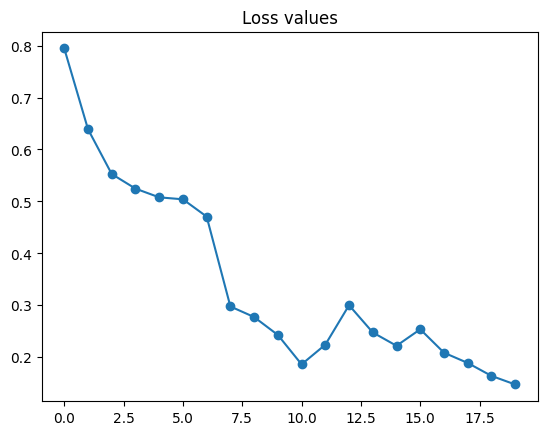

In [52]:
plt.plot(dice_loss_values,marker="o")
plt.title("Loss values")

Text(0.5, 1.0, 'Dice coefficient values')

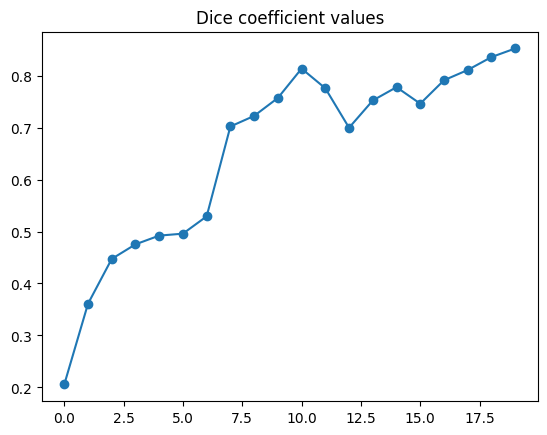

In [54]:
plt.plot(dice_coef_values,marker="o")
plt.title("Dice coefficient values")

In [55]:
plt.plot(jaccard_coef_values,marker="o")
plt.title("Jaccard(IoU) coefficient values")

Text(0.5, 1.0, 'Jaccard(IoU) coefficient values')

# Display predictions

In [86]:
plt.imshow(X_train[25][0])

In [249]:
def set_color(key):
    colors = {0:'magma',1:'viridis',2:'gray',3:'inferno',4:'cividis',5:'hot'}
    return colors[key]
    

def visualize_predictions(train_dataset,seg_dataset):
    
    for idx in range(27,1000,50):
        train_img_copy = train_dataset[idx].copy()
        seg_img_copy = SEG_TUMOR_IMAGES[idx].copy()
        pred_img = np.expand_dims(train_img_copy,axis=0)
        y_pred = model.predict(pred_img)

        plt.figure(figsize=(12,12))

        plt.subplot(1,4,1)
        plt.imshow(train_img_copy[0],cmap=set_color(key=1))
        plt.title("Input Image(Flair+T2)")

        plt.subplot(1,4,2)
        plt.imshow(SEG_TUMOR_IMAGES[idx][0],cmap=set_color(key=1))
        plt.title("Segmentation by radiologist")

        plt.subplot(1,4,3)
        plt.imshow(y_pred[0][0],cmap=set_color(key=1))
        plt.title("Prediction by trained model")
        
        plt.subplot(1,4,4)
        
        # Create mask
        mask = np.zeros((240,240),dtype=np.float32)
        # Mask prediction image to prediction_mask
        mask = np.where(y_pred[0][0]>0,y_pred[0][0],0)
        # Find coordinates
        x_coords,y_coords = np.where(mask==1)
        # Mask prediction_mask to input(FLAIR+T2) image
        train_img_copy[0][x_coords,y_coords] = 25.0
        plt.imshow(train_img_copy[0],cmap=set_color(key=1))
        plt.title("Prediction+Input Image")
        
        
        

1/1 [==============================] - 0s 16ms/step


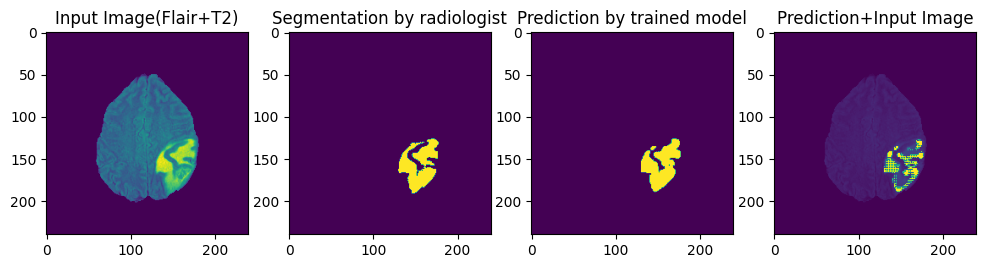

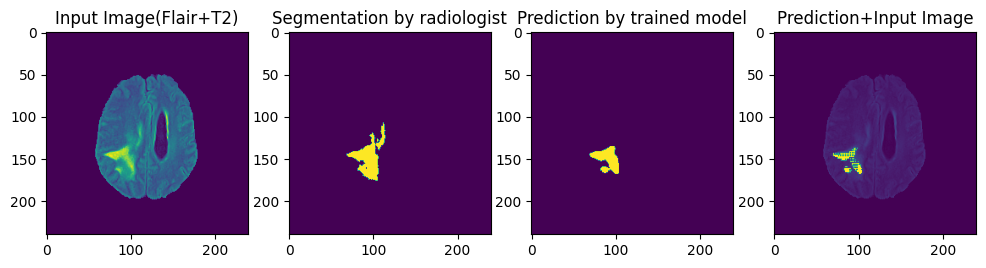

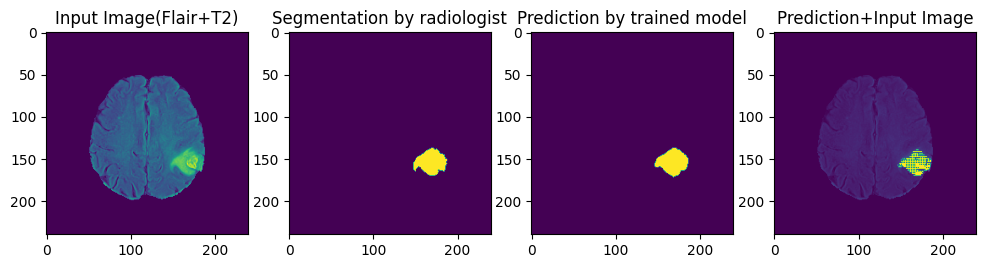

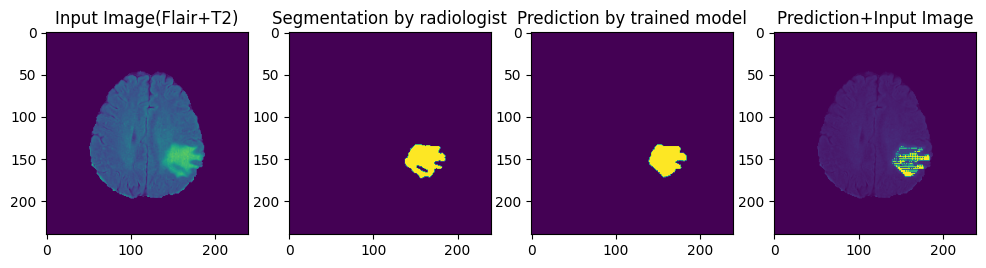

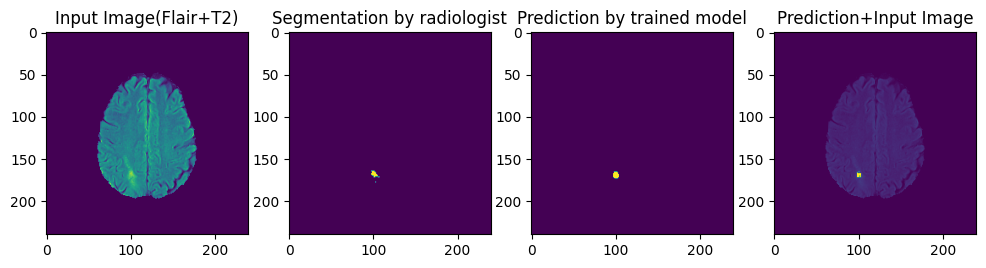

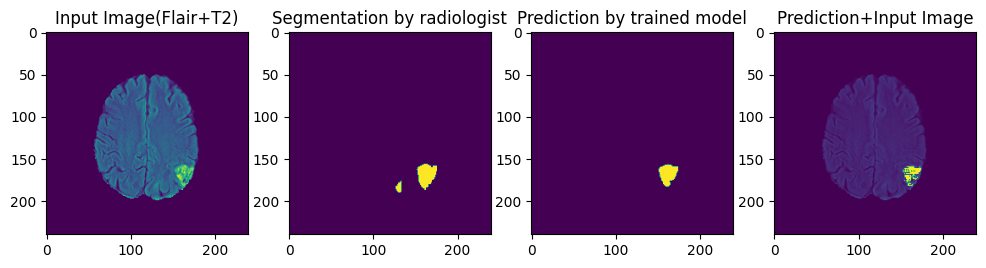

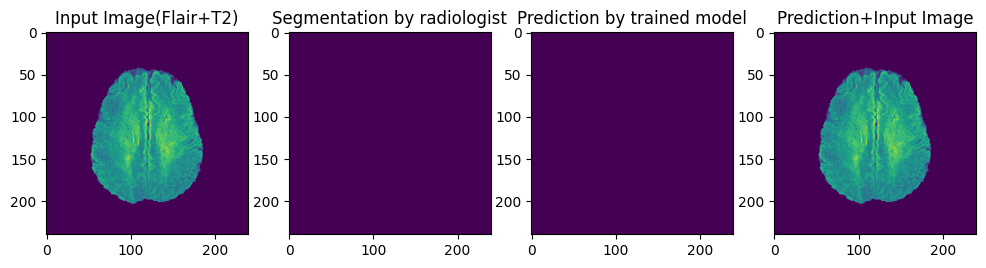

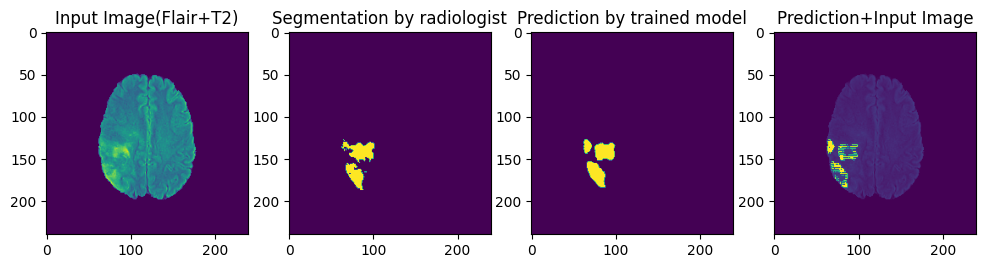

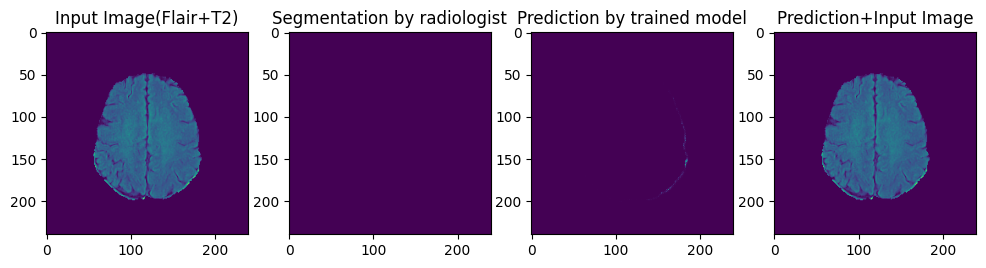

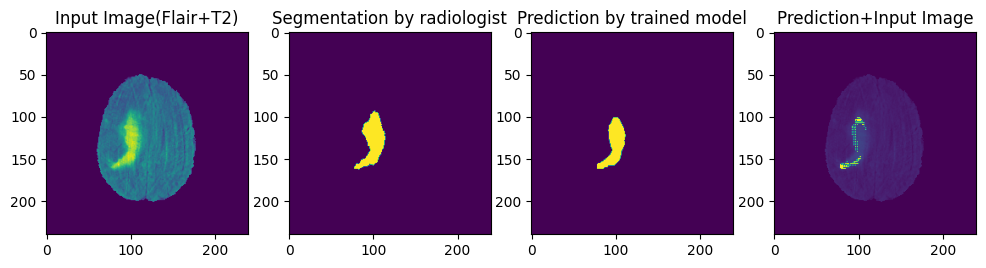

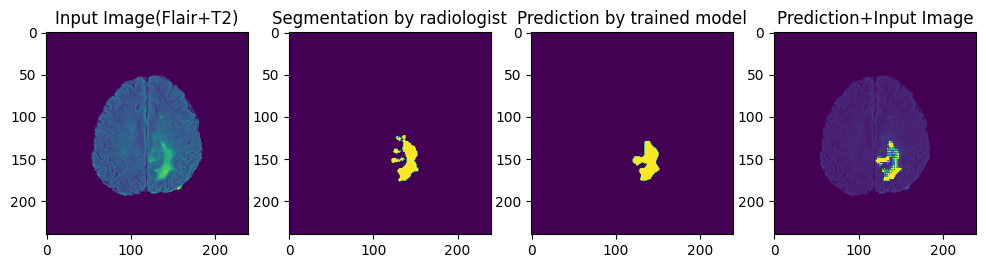

In [250]:
visualize_predictions(X_train,SEG_TUMOR_IMAGES)

# Save the model

In [103]:
os.makedirs('./models/entire_tumor')

# Save the model
model.save('./models/entire_tumor/BraTs_Entire_Tumor_UNET_model.h5')

# Save only weights(Recommended)
model.save_weights('./models/entire_tumor/BraTs_Entire_Tumor_UNET_weights.h5')

print("DONE!!")

DONE!!
